Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation 
please make sure they are updated. On Google Colab this notebook runs.

Daniel Willim: 15 h \\
Erik Jergéus: 15 h

In [ ]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)

flattened_x_train = x_train.reshape(-1,784)
flattened_x_test = x_test.reshape(-1,784)

In [ ]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr = 0.1),
              metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8064 - accuracy: 0.7698 - val_loss: 0.2491 - val_accuracy: 0.9259
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2353 - accuracy: 0.9320 - val_loss: 0.1892 - val_accuracy: 0.9428
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1807 - accuracy: 0.9474 - val_loss: 0.1479 - val_accuracy: 0.9558
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1500 - accuracy: 0.9573 - val_loss: 0.1570 - val_accuracy: 0.9535
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.9644 - val_loss: 0.1322 - val_accuracy: 0.9600
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1017 - accuracy: 0.9710 - val_loss: 0.1212 - val_accuracy: 0.9628
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0895 - accuracy: 0.9734 - val_loss: 0.1071 - val_accuracy: 0.9652
Epoch 

### Question 1) Explain the data pre-processing high-lighted in the notebook.

1. The first two operations reformats the X set to be floats between 0 and 1 instead of 8-bit UInts (Where 255 would have been a fullly filled in penstroke and 0 completely blank space). Some of the components (for example catergorical_crossentropy) of this network does not work with integers and therefore it was easier to convert it to floating point numbers.
2. The last part reformats the Y set to be a 2D array that has a binary number indicating its label, instead of having label between 0 and 9, called a one hot array. For example `[2,1,2]`-> `[[0,0,1],[0,1,0],[0,0,1]]`. This is so that it can easily be compared to the output of the network.
-------
(Did this part accidentally until we read the question again and realized that it wasn't part of the preprocessing question)

3. Create a `Sequential model`, A FFNN
4. `Flatten` is an initial transformation that makes a 2D array into a 1D array
5. Add 2 `Dense` layers, dense meaning that each node has a connection between every node in the previous layer. Activation function `Relu` means that values below 0 is 0 and every positive value is itself.
6. Our classification layer has a `softmax` function. Where every value is between 0 and 1 in order to decide which label is the correct one (still keeping information on how sure the network is on its decision)
7. `losses` takes as input a one-hot true array and the previous predictions and then rates the prediction
8. the `SGD optimizer` is a gradient optimizer which decides how the network modifies itself between iterations.
9. `fit` trains the model
10. `evaluate` evaluates the model and outputs a score

### Question 2) 4 points. Network model, training, and changing hyper-parameters.

#### A) 
* How many layers does the network in the notebook have? \\
2 hidden, 1 input, 1 output. Generally referred to as a 3-layer NN

* How many neurons does each layer have? \\
Since we omit the `input_shape` argument the model will set the input shape on first training/evaluation, which it does with x_train,y_train parameters, which are of shape (60000, 28, 28, 1),(60000, 10). This means that the input shape will be 28*28 and the output layer will have 10 nodes \\
`Input: 28x28 -> Flatten: 1x784 (784 Neurons) -> Dense: 1x64 (64 Neurons) -> Dense: 1x64 (64 Neurons) -> Dense: 1x10 (10 Neurons)-> Output` 784+64+64+10=922.

* What activation functions and why are these appropriate for this application? \\
 **Hidden: ReLU**, is the most common activation function for deep neural networks since it avoids the vanishing gradient problem, doesn't saturate as fast and is able to learn complex mapping functions. The other common activation functions, tanh and sigmoid, tend to snap towards values such as 1.0, -1.0 or 0 and it is hard for the algorithm to continue adapting the weights once they have reached such values. Furthermore it is hard to get useful gradient information for deep neural networks with those because of the vanishing gradient problem. Furthermore just like tanh and sigmoid, the ReLU function is not restricted by its linearity and can therefore model even complex functions (unlike a completely linear function). \\
 **Output: Softmax**, is optimal for classifying the values into the classes since it normalizes the output to a probability distribution, which makes it easy to decide which one to pick and also mediates how certain the algoritm is of the answer. Knowing the certainty level is very important when using NN for for example medical assistance or self driving cars, since it indicates where the network might need outside help.

* What is the total number of parameters for the network? \\
55050 (`model.count_params()`)

* Why does the input and output layers have the dimensions they have? \\
Each pixel is defined to have their own associated number, resulting in a 28x28 array from a 28x28 pixel image, which is immediately flattened into a 1x784 array. \\
There are 10 different digits and as such the output layer needs 10 possible locations to distinguish between them.



In [ ]:
print(model.count_params())
print(model.summary())

55050
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


#### B) What loss-function is used to train the network? What is the functional form (mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The loss functions is defined as `keras.losses.categorical_crossentropy` in the `model.compile()` function. According to wikipedia cross-entropy in machine learning couples the distribution of the true label (p) and the evaluated probability (q) to be `H(p_i,q_i)` and the dissimilarity between `p` and `q` can be measured with the formula `H(p,q) = Sum_i (p_i * log(q_i))` which is close to the general cross-entropy forula `H(p,q)=-E_p(log q)` where `E_p` is the expected value operator with respect to the distribution `p`. This loss function is then used for backpropagation which "computes the gradient in weight space of a feedforward neural network, with respect to a loss function". The loss function can be interpreted as a function that maps an action with a real number value indicating a cost for that action. The documentation recommends this when there are two or more label classes, which we have. Another reason for its use is that our predictions are probabilities, which is easily translateable to the "cost" in the loss function.

#### C) Train the network for 10 epochs and plot the training and validation accuracy for each epoch

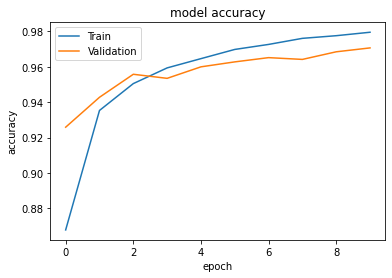

In [ ]:
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### D) Update model to implement a three-layer neural network where the hidden-layers has 500 and 300 hidden units respectively. Train for 40 epochs. **What is the best validation accuracy you can achieve?** Geoff Hinton claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay. **Implement weight decay on hidden units **and train and select 5 regularization factors from 0.000001 to 0.001. **Train 3 replicates networks** for each regularization factor. **Plot the final validation accuracy with standard deviatio**n (computed from the replicates) as a function of the regularization factor. **How close do you get to Hintons result?** – If you do not get the same results, **what factors may influence this?** (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

As can be seen in the error bar we reach a validation accuracy of roughly 0.9825 as our best average. We use l2 weight decay as it seems that Geoff Hinton refererences that in one of his papers "*An almost identical result of 1.51% was achieved in a net that had 500 units in the first hidden layer and 300 in the second hidden layer by using “softmax” output units and a regularizer that penalizes the squared weights by an amount carefully chosen using a validation set*" (Chapter 6.1 of his paper "A fast learning algorithm for deep belief nets", which was referenced in your link). We use the same amount of units, a "softmax" output, a regularizer that penalizes the squared weights (l2 weight decay). But we have just used 5 regularization factors and trained 3 times for each, nor have we chosen these weights carefully with a validation set, instead we have just tried averages within the interval given in the question. Therefore we believe that it should be possible to reach a validation accuracy similar to Geoff's if we chose a more appropriate regularization factor.

In [ ]:
# implement three-layer neural network
def train_model(reg, epochs=40, verbose=0):
  modelQ2d = Sequential()

  modelQ2d.add(Flatten())
  modelQ2d.add(Dense(500, activation = 'relu', activity_regularizer=l2(reg))) # l2 weight decay
  modelQ2d.add(Dense(300, activation = 'relu', activity_regularizer=l2(reg))) # l2 weight decay
  modelQ2d.add(Dense(num_classes, activation='softmax'))

  modelQ2d.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr = 0.1),
                  metrics=['accuracy'])

  fit_info = modelQ2d.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=verbose,
                          validation_data=(x_test, y_test))

  return fit_info.history['val_accuracy'][-1]

accs = []

with tf.device("/device:GPU:0"):
  for reg_t in [0.001,0.0001,0.00001,0.00005,0.000001]:
    val_acc = []
    for i in range(0,3):
      val_acc.append(train_model(reg_t, verbose=1, epochs=40))
    accs.append(val_acc)


Epoch 1/40
469/469 [==============================] - 2s 3ms/step - loss: 0.7860 - accuracy: 0.8247 - val_loss: 0.2752 - val_accuracy: 0.9431
Epoch 2/40
469/469 [==============================] - 1s 3ms/step - loss: 0.2554 - accuracy: 0.9479 - val_loss: 0.1995 - val_accuracy: 0.9605
Epoch 3/40
469/469 [==============================] - 1s 3ms/step - loss: 0.1887 - accuracy: 0.9631 - val_loss: 0.1609 - val_accuracy: 0.9680
Epoch 4/40
469/469 [==============================] - 1s 3ms/step - loss: 0.1438 - accuracy: 0.9747 - val_loss: 0.1423 - val_accuracy: 0.9709
Epoch 5/40
469/469 [==============================] - 1s 3ms/step - loss: 0.1220 - accuracy: 0.9803 - val_loss: 0.1301 - val_accuracy: 0.9736
Epoch 6/40
469/469 [==============================] - 1s 3ms/step - loss: 0.1032 - accuracy: 0.9842 - val_loss: 0.1211 - val_accuracy: 0.9760
Epoch 7/40
469/469 [==============================] - 2s 3ms/step - loss: 0.0905 - accuracy: 0.9876 - val_loss: 0.1089 - val_accuracy: 0.9778
Epoch 

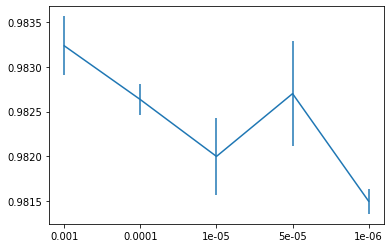

In [ ]:
x = list(map(str, [0.001,0.0001,0.00001,0.00005,0.000001]))
y = list(map(np.mean, accs))
e = list(map(np.std, accs))

plt.errorbar(x, y, yerr=e)
plt.show()

### 3) 2 points. Convolutional layers.

#### A) Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance and explain your attempts and thought process.

In [ ]:
with tf.device("/device:GPU:0"):
  conv_model = Sequential()

  conv_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  conv_model.add(MaxPooling2D((2, 2)))
  conv_model.add(Conv2D(64, (3, 3), activation='relu'))
  conv_model.add(MaxPooling2D((2, 2)))
  conv_model.add(Flatten())
  conv_model.add(Dense(100, activation='relu'))
  conv_model.add(Dense(num_classes, activation='softmax')) 
  conv_model.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer=keras.optimizers.SGD(lr = 0.1),
                     metrics=['accuracy'])

  fit_info = conv_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=40,
                            verbose=0,
                            validation_data=(x_test, y_test))

  print(f"CNN accuracy: {100*conv_model.evaluate(x_test, y_test, verbose=0)[1]:,.2f} % on test data.")

CNN accuracy: 99.06 % on test data.


We replicated the CNN (Convolutional Neural Network), `LeNet-5` described in this paper, [1] and consistently get a accuracy greater than 99%. Apart from convolutional layers and previously used layers we used a `MaxPooling2D` layer with a 2x2 window and a step of 2. This is a sub-sampling layer where 2x2 widow is moved across the feature maps and in each 2x2 grid only the maximum value is output hence greatly reducing the dimensions of the feature map. For example, in the second layer the feature maps are reduced from a 26x26x32 to a 13x13x32 matrix. In CNNs a maxpooling layer is often used for two reasons, first it reduces the number of parameters, increasing computation and training time and secondly it helps prevent overfitting.

[1] http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

In [ ]:
conv_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_49 (Dense)             (None, 10)              


#### B) Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the particular application?

A convolutional layer instead works by letting mathematical kernels convolve across the input, for example in our `conv_model` the first convolutional layer has 32 different mathematical kernels of size 3x3. This allows the network to extract different features in the images, for example one of the kernels in the first layer might detect horizontal edges and another might detect diagonal lines. If the network has more convolutional layers they will then "combine" these features into more advanced ones. Convolutional layers combined with Maxpooling layers (discussed in previous question) and a few fully connected layers at the end to do the actual classification have been proven very useful in tasks involving images, e.g. computer vision or image classification. 

A CNN also have a lot less parameters to train than a network only using fully connected layers since each output pixel only took input from a small subset of the whole image, decreasing training time a lot. For image classification it also makes sense that pixels close to each other will be correlated while pixels far from each other will not be correlated.

### Question 4) Auto-Encoder for denoising


In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [ ]:
latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

with tf.device("/device:GPU:0"):
  fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                                epochs=32,
                                batch_size=64,
                                shuffle=True,
                                verbose=0,
                                validation_data=(flattened_x_test_seasoneed, flattened_x_test))

#### A) The notebook implements a simple denoising deep autoencoder model. Explain what the model does: use the data-preparation and model definition code to explain how the goal of the model is achieved. Explain the role of the loss function? Draw a diagram of the model and include it in your report. Train the model with the settings given.

The goal is to train a autoencoder to be able to denoise the mnist images. The network is structured with 4 layers where the first two encode the image into a smaller space while trying to preserve enough information in order to rebuild the image in the last two layers. This encoding into smaller spaces will be loss full but the goal is that the encoding should find the essence of each image and the decoder would then be able to recreate the image from this essence but in the process the noise in the images will also have been removed. 

The model is trained by taking the flattened mnist images and adding random noise to them, then running them through the autoencoder and comparing the output to the original network. 

The loss function will compare the denoised image to the actual image and see how right the autoencoder was. This information will then be used during the back propagation to update the weights to improve predictions.

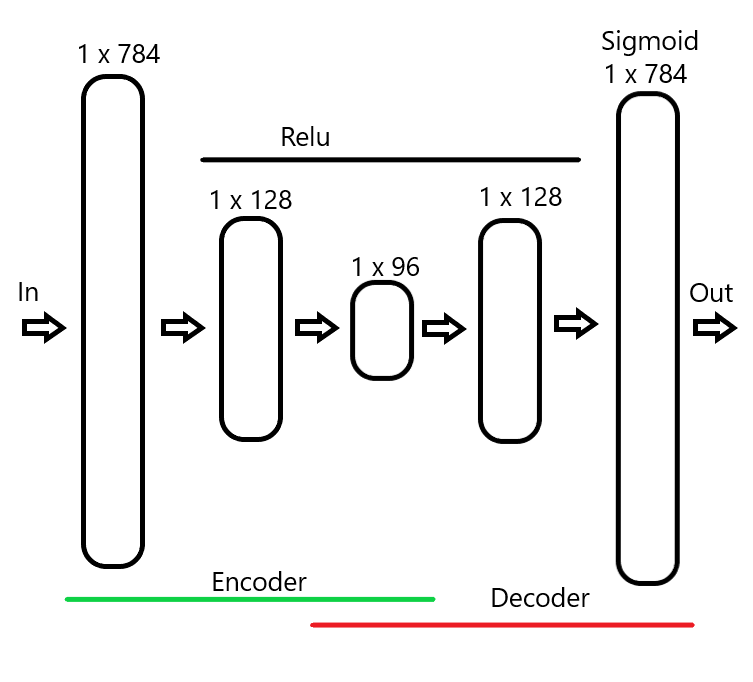


#### B) Add increasing levels of noise to the test-set using the salt_and_pepper()-function (0 to 1). Use matplotlib to visualize a few examples (3-4) in the original, “seasoned” (noisy), and denoised versions (Hint: for visualization use imshow(), use the trained autoencoder to denoise the noisy digits). At what noise level does it become difficult to identify the digits for you? At what noise level does the denoising stop working?

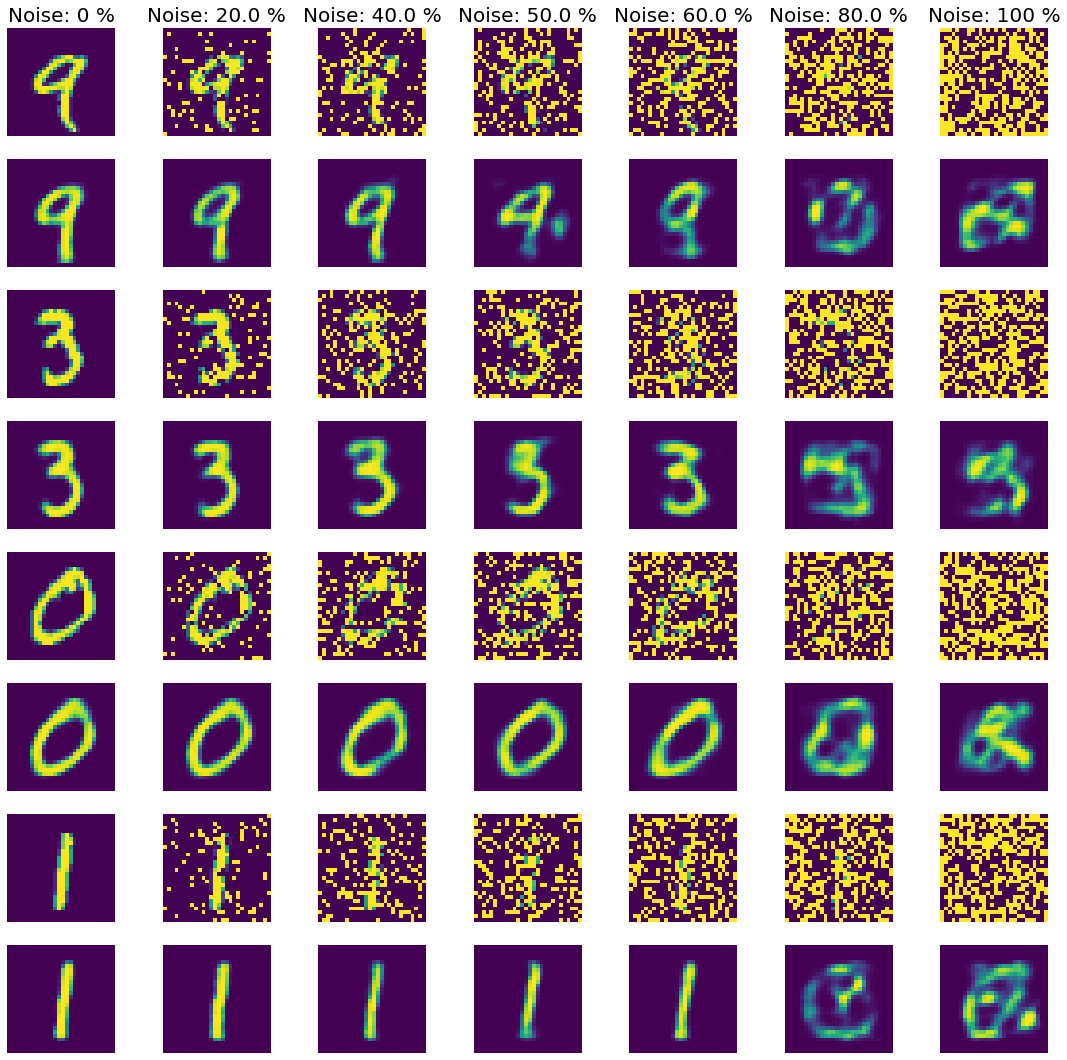

In [ ]:
noises = [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1]
img_i = [4, 74, 1, 40]

fig, axs = plt.subplots(nrows=2*len(img_i), ncols=len(noises), figsize=(15,15))

for i, img in enumerate(img_i):
  for j, noise in enumerate(noises):
    axs[2*i][j].imshow(tf.reshape(
                        salt_and_pepper(flattened_x_train[img].reshape(1,-1), 
                                        noise_level=noise), 
                        (28,28)))
    axs[2*i+1][j].imshow(tf.reshape(
                          autoencoder(
                            salt_and_pepper(flattened_x_train[img].reshape(1,-1), 
                                            noise_level=noise)), 
                          (28,28)))
    axs[2*i][j].axis('off')
    axs[2*i+1][j].axis('off')

cols = list(map(lambda n: f"Noise: {100*n} %", noises))
for ax, col in zip(axs[0], cols):
    ax.set_title(col, size=20)

fig.tight_layout()

* At what noise level does it become difficult to identify the digits for you?

At noise level 40 % (3rd image from the left) it is hard but still doable to with reasonable confidence identify the digits. Some images are doable past that, but that is probably just because the noise algorithm does not add any green pixels (which indicates less forceful strokes of the pen) and because we already know the answer.

* At what noise level does the denoising stop working?

Up to around 50 % the denoising is pretty accurate (it changes some depending on where the noice appears).

#### C) Test whether denoising improves the classification with the best performing model you obtained in questions 2 or 3. Plot the true-positive rate as a function of noise-level for the seasoned and denoised datasets – assume that the correct classification is the most likely class-label. Discuss your results. 


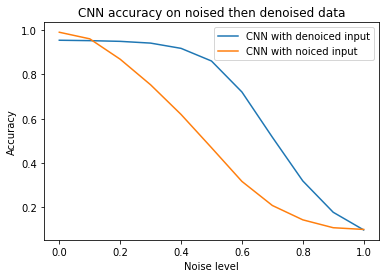

In [ ]:
with tf.device("/device:GPU:0"):
  noise_levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

  autoencoded_accs = []
  seasoned_accs = []

  for i,noise in enumerate(noise_levels):
    autoencoded_x = tf.reshape(autoencoder(
                              salt_and_pepper(flattened_x_test, 
                                              noise_level=noise)), 
                    (10000,28,28,1))
    acc = conv_model.evaluate(autoencoded_x, y_test, verbose=0)[1]
    autoencoded_accs.append(acc)

    seasoned_x = tf.reshape(salt_and_pepper(
                              flattened_x_test, 
                              noise_level=noise), 
                            (10000,28,28,1))
    seasoned_accs.append(conv_model.evaluate(seasoned_x, y_test, verbose=0)[1])

  plt.plot(noise_levels, autoencoded_accs, label="CNN with denoiced input")
  plt.plot(noise_levels, seasoned_accs, label="CNN with noiced input")
  plt.title("CNN accuracy on noised then denoised data")
  plt.legend()
  plt.ylabel("Accuracy")
  plt.xlabel("Noise level")
  plt.show()

From the graph we see several interesting things, firstly with 10 % noise or less the CNN with noised input outperforms the denoised version. This is because the loss full compression in the autoencoder and that it does not always manage to recreate the correct image from the latent space code. But for all noise levels above 10 % the denoised CNN outperforms the other version by a lot. We also see that the accuracy of the denoised CNN is almost the same up to 40-50 % confirming what we saw in the previous question that the autoencoder manages to correctly denoise the images up to that threshold.

#### D) Explain how you can use the decoder part of the denoising auto-encoder to generate synthetic “hand-written” digits? – Describe the procedure and show examples in your report.

The decoder will try to recreate the handwritten digit from the latent space code that the encoder created. Therefor if we generate latent space code in some other way the decoder should be able to take this code and decode in into a "handwritten" digit, even though no handwritten digit was encoded. 

We tried several different ways to generate this "new" latent space code but could never get anything that resembles a digit. We tried generating the code by different random distributions, like Chi-Squared, Binomial or normal distribution but the decoder only created weird blobs of colour. We also tried to write are our latent space code by running a vertical line through the decoder, sadly also this did not work.

The closes we got that worked in some cases was to encode a digit then shuffle latent space code before decoding it. 

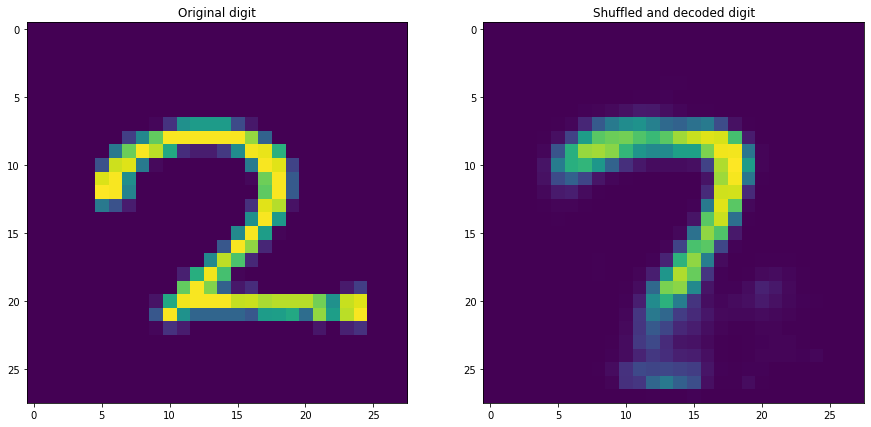

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,15))

axs[0].imshow(np.reshape(flattened_x_test[77], (28,28)))
axs[0].set_title("Original digit")

x = encoder_only.predict(flattened_x_test[77].reshape(1,-1))
np.random.shuffle(x)

axs[1].imshow(np.reshape(decoder.predict(x), (28,28)))
axs[1].set_title("Shuffled and decoded digit")
plt.show()

*Below our different tries are show, we also inspected the latent code of a few encoded number to see if we saw any patterns but did not realy find any patterns*

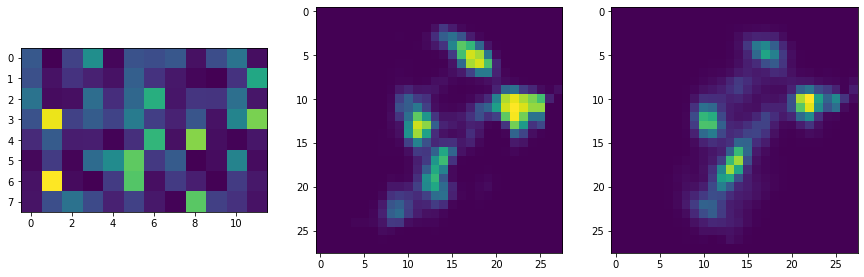

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

code = [
        [0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0]
      ]

# Generate Random 1x96 array
#x = np.random.binomial(size=(1,96), n=1, p=(1 - 0.5))
#x = np.random.rand(1,96)
x = np.random.chisquare(2, (1,96))
axs[0].imshow(np.reshape(x, (8,12)))

# Run through Decoder, then reshape into 28x28 array
dx = tf.reshape(decoder.predict(np.reshape(x, (1,96))), 
                      (28,28))
axs[1].imshow(dx)

#Flatten and run through autoencoder, then reshape into 28x28 array
tx = tf.reshape(autoencoder(tf.reshape(dx,(-1,784))),(28,28))
axs[2].imshow(tx)
plt.show()

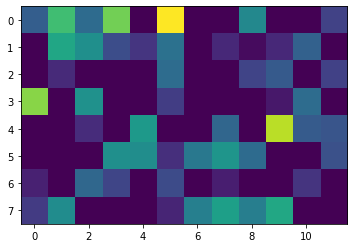

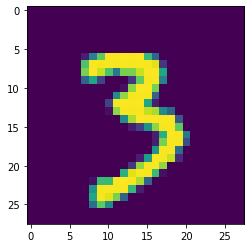

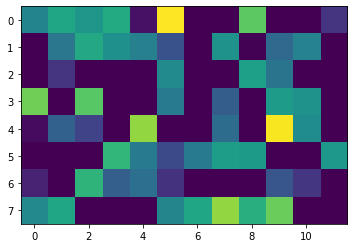

In [ ]:
i = 30

latent_code = encoder_only.predict(flattened_x_test[i].reshape(1,-1))
dx = tf.reshape((latent_code), 
                (8,12))

plt.imshow(dx)
plt.show()
plt.imshow(np.reshape(flattened_x_test[i], (28,28)))
plt.show()

latent_code = encoder_only.predict(flattened_x_test_seasoneed[i].reshape(1,-1))
dx = tf.reshape((latent_code), 
                (8,12))

plt.imshow(dx)
plt.show()